In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns =['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [9]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
# finding mean and median values of fare and age

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [12]:
# now we will fill the missing values by mean and median, and create new cols

X_train['Age_by_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_by_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_by_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_by_median'] = X_train['Fare'].fillna(median_fare)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_by_mean,Age_by_median,Fare_by_mean,Fare_by_median
800,34.0,13.0000,0,34.0,34.0,13.0000,13.0000
735,28.5,16.1000,0,28.5,28.5,16.1000,16.1000
310,24.0,83.1583,0,24.0,24.0,83.1583,83.1583
655,24.0,73.5000,2,24.0,24.0,73.5000,73.5000
232,59.0,13.5000,0,59.0,59.0,13.5000,13.5000


In [14]:
print('Original variance of age:' , X_train['Age'].var())
print('Variance of age after mean imputation' , X_train['Age_by_mean'].var())
print('Variance of age after median imputation' , X_train['Age_by_median'].var())

print('Original variance of Fare:' , X_train['Fare'].var())
print('Variance of fare after mean imputation' , X_train['Fare_by_mean'].var())
print('Variance of fare after median imputation' , X_train['Fare_by_median'].var())



Original variance of age: 210.2517072477435
Variance of age after mean imputation 168.85193366872227
Variance of age after median imputation 169.20731007048155
Original variance of Fare: 2761.0314349486343
Variance of fare after mean imputation 2621.232374951235
Variance of fare after median imputation 2637.012481677765




*   Whenever we apply mean/median imputation on our data, the variance shrinks.
*   The only thing we have to keep in mind is that it should not shrink too much.



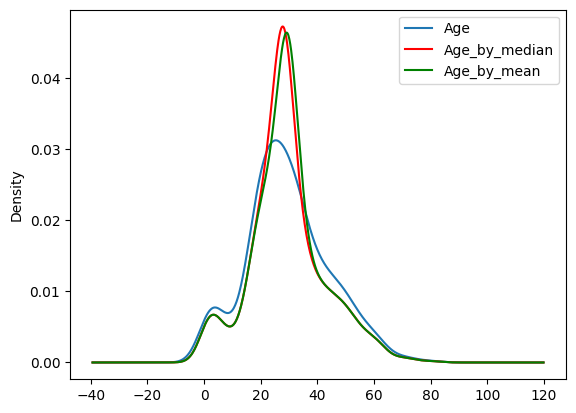

In [15]:
# now we will try to find the changes in distribution of data

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Age_by_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_by_mean'].plot(kind ='kde', ax=ax, color ='green')

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc ='best')

**As we can see in the above distribution, there is a drastic change in distribution of age, RED FLAG**

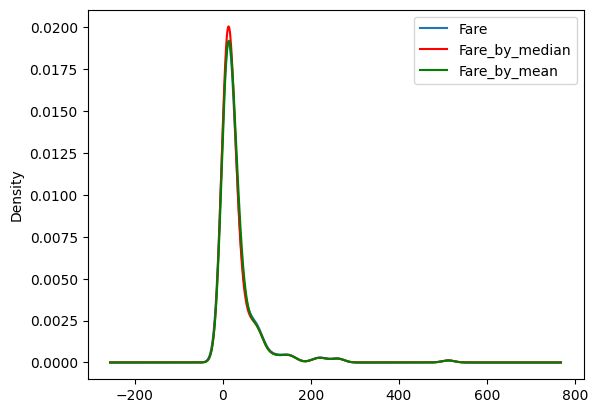

In [16]:
# now we will try to find the changes in distribution of data

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Fare_by_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_by_mean'].plot(kind ='kde', ax=ax, color ='green')

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc ='best')

**The above curve suggests than there is very slight change in the distribution of Fare, GREEN FLAG**

In [17]:
X_train.cov()

,Age,Fare,Family,Age_by_mean,Age_by_median,Fare_by_mean,Fare_by_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_by_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_by_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_by_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_by_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [18]:
X_train.corr()

,Age,Fare,Family,Age_by_mean,Age_by_median,Fare_by_mean,Fare_by_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_by_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_by_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_by_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_by_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

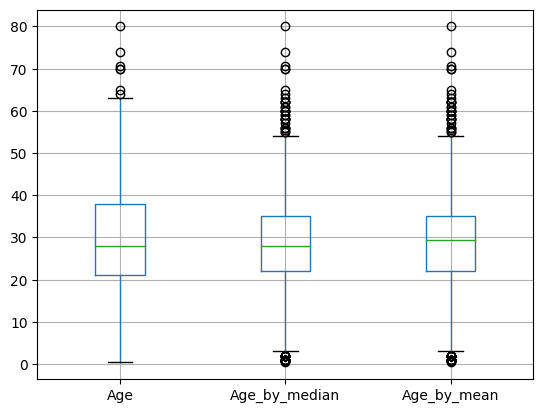

In [19]:
# to search for any outliers

X_train[['Age', 'Age_by_median', 'Age_by_mean']].boxplot()

**initially there were less outliers, but as soon as we applied mean or median , the outliers increased.**

<Axes: >

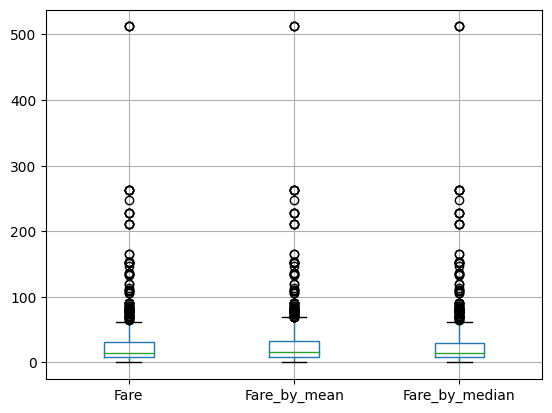

In [20]:
X_train[['Fare', 'Fare_by_mean','Fare_by_median']].boxplot()

**less to no change in number of outliers, Green flag**

## **Using Sklearn**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [22]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [23]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder ='passthrough')

In [24]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [25]:
# will return mean of age

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [26]:
# will return median of fare

trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [27]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)



In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])